In [28]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('model_data.csv')

In [30]:
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class,Player Level
0,1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,...,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0,1
1,3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,...,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0,1
2,7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,...,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,14.000000,0,2
3,8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,...,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,7.423895,0,2
4,9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,...,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,2.079266,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,...,1.2,0.600,0.732,0.514,5.6,5.5,4.0,0.068878,0,0
812,1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,...,1.8,0.348,0.564,0.693,5.6,2.9,5.6,1.125000,0,3
813,1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,...,1.8,0.405,0.477,0.791,1.9,0.1,3.1,3.617225,0,1
814,1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,...,-0.2,0.435,0.500,0.816,2.2,4.8,3.2,-1012.987013,1,2


In [31]:
df[df['Player']=='Ray Allen']

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class,Player Level
344,608,2006,Ray Allen,SG,30.0,SEA,78.0,3022.0,22.2,0.590,...,-3.1,0.412,0.486,0.903,-3.3,-3.0,6.3,-306.220096,1,2
375,659,2007,Ray Allen,SG,31.0,SEA,55.0,2219.0,21.6,0.564,...,-2.1,0.372,0.479,0.903,-3.0,10.8,9.7,24825.396825,0,2
407,721,2008,Ray Allen,SG,32.0,BOS,73.0,2624.0,16.4,0.584,...,-0.1,0.398,0.485,0.907,10.8,7.9,11.1,26.851852,0,2
440,775,2009,Ray Allen,SG,33.0,BOS,79.0,2876.0,17.3,0.624,...,-0.3,0.409,0.542,0.952,7.9,3.7,7.9,1.844146,0,2
472,826,2010,Ray Allen,SG,34.0,BOS,80.0,2819.0,15.2,0.601,...,-0.7,0.363,0.556,0.913,3.7,5.7,10.0,1436.879918,0,2
506,883,2011,Ray Allen,SG,35.0,BOS,80.0,2890.0,16.4,0.615,...,0.4,0.444,0.520,0.881,5.7,2.6,4.7,1.026150,0,2
540,939,2012,Ray Allen,SG,36.0,BOS,46.0,1565.0,14.8,0.607,...,0.3,0.453,0.463,0.915,2.6,8.2,5.4,3207.855974,0,2
573,987,2013,Ray Allen,SG,37.0,MIA,79.0,2035.0,14.7,0.599,...,-1.5,0.419,0.480,0.886,8.2,5.1,4.1,1.570356,0,2


## Pre-Processing

In [32]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%',
       'FT%', 'TmNetRtg', 'Next Rtg', 'Next WS', 'Veteran Value', 'VV Class',
       'Player Level'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

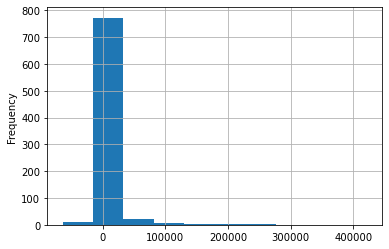

In [33]:
df['Veteran Value'].plot.hist(grid=True)

In [34]:
# calculate summary statistics
data = df['Veteran Value']
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)
lower, upper = -30000,30000

-74952.88448704804 83684.74167012605


In [35]:
outliers = [x[0] for x in enumerate(df['Veteran Value']) if x[1] < lower or x[1] > upper]
outliers

[17,
 22,
 25,
 100,
 110,
 116,
 141,
 142,
 150,
 153,
 207,
 238,
 259,
 269,
 272,
 280,
 295,
 425,
 466,
 467,
 468,
 561,
 564,
 588,
 602,
 618,
 625,
 655,
 663,
 664,
 681,
 684,
 686,
 695,
 697,
 728,
 732,
 785,
 799,
 803]

In [36]:
df.drop(index=outliers,inplace=True)

<AxesSubplot:ylabel='Frequency'>

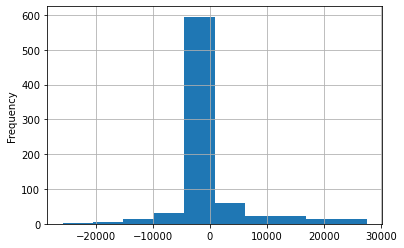

In [37]:
df['Veteran Value'].plot.hist(grid=True)

[  2.   4.  15.  30. 595.  60.  21.  23.  13.  13.] [-25787.54578755 -20461.87762854 -15136.20946954  -9810.54131054
  -4484.87315154    840.79500746   6166.46316646  11492.13132546
  16817.79948447  22143.46764347  27469.13580247]


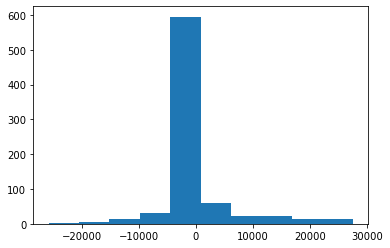

In [38]:
n, bins, patches = plt.hist(df['Veteran Value'])
print(n,bins)

In [39]:
print(df['Veteran Value'].quantile(0.16),df['Veteran Value'].quantile(0.33),df['Veteran Value'].quantile(0.49),
      df['Veteran Value'].quantile(0.66),df['Veteran Value'].quantile(0.82))
print(df['Veteran Value'].quantile(0.1))

-732.0261437908493 0.9964010920824024 2.7948529411764707 18.63425925925926 403.9479039479037
-2410.3629746212873


In [40]:
target = df['Veteran Value']

def getClass(vv):
    if vv < -732:
        return 0
    elif -732 <= vv < 0:
        return 1
    elif 0 <= vv < 20:
        return 2
    elif 20 <= vv < 400:
        return 3
    elif 400 < vv:
        return 4

    
df['VV Class'] = [getClass(vv) for vv in df['Veteran Value']]
target_class = df['VV Class']

In [41]:
df['Veteran Value'].describe()

count      776.000000
mean       701.920421
std       5762.341195
min     -25787.545788
25%          0.039286
50%          3.069227
75%         86.598774
max      27469.135802
Name: Veteran Value, dtype: float64

In [42]:
df.drop(['Unnamed: 0','Age','Year','Player','Pos','Tm','Next WS','WS','Next Rtg','TmNetRtg','Veteran Value', 'VV Class'], axis=1, inplace=True)

In [43]:
df.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', '3P%',
       '2P%', 'FT%', 'Player Level'],
      dtype='object')

In [44]:
#try scaling values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, target_class.values, random_state=42,test_size=0.2)

### Logistic Regression Classifier

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0).fit(xtrain, ytrain)
clf.predict(xtest)
clf.predict_proba(xtest)
scores = cross_val_score(clf, xtest, ytest, cv=5)
print(scores.mean())

0.4935483870967742


In [47]:
metrics.roc_auc_score(ytest,clf.predict_proba(xtest),multi_class='ovr')

0.6332282815850263

### KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

n_neighbors=15
neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [49]:
scores = cross_val_score(neigh, xtest, ytest, cv=5)
print(scores.mean())

0.5


In [50]:
metrics.roc_auc_score(ytest,neigh.predict_proba(xtest),multi_class='ovr')

0.5774719586545947

### Random Forests Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=250, max_depth=50, min_samples_leaf=10, min_samples_split = 10, max_features=10)
rf.fit(xtrain, ytrain)
rf.predict_proba(xtest)

array([[0.11356361, 0.07944814, 0.58561728, 0.11690895, 0.10446202],
       [0.16945175, 0.06772763, 0.44102257, 0.15908143, 0.16271662],
       [0.08812813, 0.02544672, 0.21639779, 0.22950344, 0.44052393],
       [0.25349628, 0.1284866 , 0.25685019, 0.19788188, 0.16328505],
       [0.21108302, 0.11386335, 0.34188028, 0.19595182, 0.13722153],
       [0.14019758, 0.0565391 , 0.22894587, 0.28277542, 0.29154203],
       [0.10536566, 0.1270744 , 0.61420052, 0.07857573, 0.07478369],
       [0.15313563, 0.05759803, 0.28557344, 0.14775967, 0.35593322],
       [0.09112997, 0.04408583, 0.18987538, 0.37420417, 0.30070464],
       [0.13143604, 0.08959017, 0.58035636, 0.09161494, 0.10700249],
       [0.11803799, 0.10504407, 0.44581229, 0.19523216, 0.1358735 ],
       [0.12598106, 0.07291374, 0.61024702, 0.10555435, 0.08530384],
       [0.23348411, 0.12458317, 0.44378016, 0.09686738, 0.10128517],
       [0.15130533, 0.03089027, 0.18442878, 0.17394195, 0.45943366],
       [0.27828104, 0.09440826, 0.

In [52]:
scores = cross_val_score(rf, xtest, ytest, cv=5)
print(scores.mean())

0.4870967741935484


In [53]:
metrics.roc_auc_score(ytest,rf.predict_proba(xtest),multi_class='ovr')

0.6280369748033003

### Boosted Classifier


In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                         n_estimators=225, learning_rate=0.5)
abc.fit(xtrain, ytrain)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=64),
                   learning_rate=0.5, n_estimators=225)

In [55]:
scores = cross_val_score(abc, xtest, ytest, cv=5)
print(scores.mean())

0.4806451612903226


In [56]:
metrics.roc_auc_score(ytest,abc.predict_proba(xtest),multi_class='ovr')

0.5550724436685286

### Neural Network

In [57]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(1000,100,10),activation='relu',learning_rate_init=0.001,batch_size=256, verbose=True,max_iter=100)
mlpc.fit(xtrain, ytrain)

Iteration 1, loss = 1.57616926
Iteration 2, loss = 1.47811263
Iteration 3, loss = 1.45994764
Iteration 4, loss = 1.44801503
Iteration 5, loss = 1.43871961
Iteration 6, loss = 1.42571202
Iteration 7, loss = 1.41332040
Iteration 8, loss = 1.40788119
Iteration 9, loss = 1.39721201
Iteration 10, loss = 1.39194451
Iteration 11, loss = 1.38186205
Iteration 12, loss = 1.37706881
Iteration 13, loss = 1.37049992
Iteration 14, loss = 1.36429286
Iteration 15, loss = 1.36075018
Iteration 16, loss = 1.35742583
Iteration 17, loss = 1.35244096
Iteration 18, loss = 1.34807396
Iteration 19, loss = 1.33956155
Iteration 20, loss = 1.33932475
Iteration 21, loss = 1.33228098
Iteration 22, loss = 1.32796595
Iteration 23, loss = 1.32423514
Iteration 24, loss = 1.31894743
Iteration 25, loss = 1.31418584
Iteration 26, loss = 1.31555214
Iteration 27, loss = 1.31562683
Iteration 28, loss = 1.30304627
Iteration 29, loss = 1.30034037
Iteration 30, loss = 1.30266910
Iteration 31, loss = 1.29629995
Iteration 32, los

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=256, hidden_layer_sizes=(1000, 100, 10), max_iter=100,
              verbose=True)

In [58]:
scores = cross_val_score(mlpc, xtest, ytest, cv=5)
print(scores.mean())

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 1, loss = 1.77152837
Iteration 2, loss = 1.66199349
Iteration 3, loss = 1.60704710
Iteration 4, loss = 1.56658202
Iteration 5, loss = 1.52281180
Iteration 6, loss = 1.48019459
Iteration 7, loss = 1.44198691
Iteration 8, loss = 1.40965787
Iteration 9, loss = 1.38543699
Iteration 10, loss = 1.37157543
Iteration 11, loss = 1.36732670
Iteration 12, loss = 1.36970823
Iteration 13, loss = 1.37473869
Iteration 14, loss = 1.37856025
Iteration 15, loss = 1.37973544
Iteration 16, loss = 1.37718005
Iteration 17, loss = 1.36996938
Iteration 18, loss = 1.36008092
Iteration 19, loss = 1.35021059
Iteration 20, loss = 1.34108191
Iteration 21, loss = 1.33321801
Iteration 22, loss = 1.32673877
Iteration 23, loss = 1.32180357
Iteration 24, loss = 1.31804644
Iteration 25, loss = 1.31514096
Iteration 26, loss = 1.31223050
Iteration 27, loss = 1.30914560
Iteration 28, loss = 1.30549497
Iteration 29, loss = 1.30098794
Iteration 30, loss = 1.29589034
Iteration 31, loss = 1.29058707
Iteration 32, los

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 10, loss = 1.38784391
Iteration 11, loss = 1.37995449
Iteration 12, loss = 1.37194129
Iteration 13, loss = 1.36386844
Iteration 14, loss = 1.35577786
Iteration 15, loss = 1.34760650
Iteration 16, loss = 1.33937859
Iteration 17, loss = 1.33171273
Iteration 18, loss = 1.32438875
Iteration 19, loss = 1.31748112
Iteration 20, loss = 1.31051136
Iteration 21, loss = 1.30365512
Iteration 22, loss = 1.29680162
Iteration 23, loss = 1.29007206
Iteration 24, loss = 1.28295196
Iteration 25, loss = 1.27567236
Iteration 26, loss = 1.26806766
Iteration 27, loss = 1.26029590
Iteration 28, loss = 1.25224304
Iteration 29, loss = 1.24382435
Iteration 30, loss = 1.23540304
Iteration 31, loss = 1.22704993
Iteration 32, loss = 1.21859309
Iteration 33, loss = 1.20998287
Iteration 34, loss = 1.20147959
Iteration 35, loss = 1.19302011
Iteration 36, loss = 1.18474121
Iteration 37, loss = 1.17653887
Iteration 38, loss = 1.16837692
Iteration 39, loss = 1.16017187
Iteration 40, loss = 1.15204571
Iteratio

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 1, loss = 1.55202712
Iteration 2, loss = 1.52524709
Iteration 3, loss = 1.49800884
Iteration 4, loss = 1.47536558
Iteration 5, loss = 1.45741012
Iteration 6, loss = 1.44434580
Iteration 7, loss = 1.43294691
Iteration 8, loss = 1.42298189
Iteration 9, loss = 1.41385614
Iteration 10, loss = 1.40564907
Iteration 11, loss = 1.39763039
Iteration 12, loss = 1.38917167
Iteration 13, loss = 1.38067667
Iteration 14, loss = 1.37253091
Iteration 15, loss = 1.36479837
Iteration 16, loss = 1.35760369
Iteration 17, loss = 1.35082957
Iteration 18, loss = 1.34471985
Iteration 19, loss = 1.34009147
Iteration 20, loss = 1.33598770
Iteration 21, loss = 1.33132067
Iteration 22, loss = 1.32582303
Iteration 23, loss = 1.31979143
Iteration 24, loss = 1.31378523
Iteration 25, loss = 1.30696081
Iteration 26, loss = 1.30085467
Iteration 27, loss = 1.29488169
Iteration 28, loss = 1.28841760
Iteration 29, loss = 1.28200780
Iteration 30, loss = 1.27592571
Iteration 31, loss = 1.26993886
Iteration 32, los

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 6, loss = 1.54703466
Iteration 7, loss = 1.52042159
Iteration 8, loss = 1.48849750
Iteration 9, loss = 1.45657191
Iteration 10, loss = 1.42675289
Iteration 11, loss = 1.40198164
Iteration 12, loss = 1.38381512
Iteration 13, loss = 1.37365012
Iteration 14, loss = 1.36983550
Iteration 15, loss = 1.37038957
Iteration 16, loss = 1.37260384
Iteration 17, loss = 1.37483694
Iteration 18, loss = 1.37583207
Iteration 19, loss = 1.37424277
Iteration 20, loss = 1.37004843
Iteration 21, loss = 1.36432423
Iteration 22, loss = 1.35796270
Iteration 23, loss = 1.35167902
Iteration 24, loss = 1.34616072
Iteration 25, loss = 1.34151316
Iteration 26, loss = 1.33750752
Iteration 27, loss = 1.33400989
Iteration 28, loss = 1.33103477
Iteration 29, loss = 1.32835953
Iteration 30, loss = 1.32582373
Iteration 31, loss = 1.32329917
Iteration 32, loss = 1.32053785
Iteration 33, loss = 1.31728931
Iteration 34, loss = 1.31341639
Iteration 35, loss = 1.30907981
Iteration 36, loss = 1.30465795
Iteration 37

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 2, loss = 1.82237599
Iteration 3, loss = 1.73002573
Iteration 4, loss = 1.66188937
Iteration 5, loss = 1.60454995
Iteration 6, loss = 1.54894863
Iteration 7, loss = 1.49662330
Iteration 8, loss = 1.46098160
Iteration 9, loss = 1.44602085
Iteration 10, loss = 1.44901321
Iteration 11, loss = 1.46203644
Iteration 12, loss = 1.47449821
Iteration 13, loss = 1.47908659
Iteration 14, loss = 1.47422353
Iteration 15, loss = 1.46193127
Iteration 16, loss = 1.44566214
Iteration 17, loss = 1.42938347
Iteration 18, loss = 1.41518739
Iteration 19, loss = 1.40488308
Iteration 20, loss = 1.40027571
Iteration 21, loss = 1.40106018
Iteration 22, loss = 1.40064454
Iteration 23, loss = 1.39729982
Iteration 24, loss = 1.39164627
Iteration 25, loss = 1.38368632
Iteration 26, loss = 1.37309833
Iteration 27, loss = 1.36129751
Iteration 28, loss = 1.34969040
Iteration 29, loss = 1.34090848
Iteration 30, loss = 1.33562959
Iteration 31, loss = 1.33169751
Iteration 32, loss = 1.32655615
Iteration 33, lo

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
metrics.roc_auc_score(ytest,mlpc.predict_proba(xtest),multi_class='ovr')

0.6518566139254778

### Voting Classifier

In [60]:
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('LRC',clf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))


vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=True) 
vot_soft.fit(xtrain, ytrain)


[Voting] ...................... (1 of 4) Processing RFC, total=   1.2s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.2s
[Voting] ...................... (3 of 4) Processing ABC, total=   2.1s
Iteration 1, loss = 1.61869349
Iteration 2, loss = 1.50728424
Iteration 3, loss = 1.46766474
Iteration 4, loss = 1.45580319
Iteration 5, loss = 1.45165926
Iteration 6, loss = 1.43817912
Iteration 7, loss = 1.43230696
Iteration 8, loss = 1.41981408
Iteration 9, loss = 1.41323166
Iteration 10, loss = 1.40590235
Iteration 11, loss = 1.39887260
Iteration 12, loss = 1.39133062
Iteration 13, loss = 1.38394732
Iteration 14, loss = 1.37809700
Iteration 15, loss = 1.37161196
Iteration 16, loss = 1.36134417
Iteration 17, loss = 1.36243942
Iteration 18, loss = 1.35574986
Iteration 19, loss = 1.36024667
Iteration 20, loss = 1.35647220
Iteration 21, loss = 1.34597480
Iteration 22, loss = 1.34696831
Iteration 23, loss = 1.33285758
Iteration 24, loss = 1.33349854
Iteration 25, loss = 1.32814

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(max_depth=50,
                                                     max_features=10,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10,
                                                     n_estimators=250)),
                             ('LRC',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('ABC',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                       min_samples_split=64),
                                                 learning_rate=0.5,
                                                 n_estimators=225)),
                             ('MLP',
              

In [61]:
scores = cross_val_score(vot_soft, xtest, ytest, cv=5)
print(scores.mean())

[Voting] ...................... (1 of 4) Processing RFC, total=   0.5s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.0s
[Voting] ...................... (3 of 4) Processing ABC, total=   0.8s
Iteration 1, loss = 1.75993800
Iteration 2, loss = 1.69954905
Iteration 3, loss = 1.64381591
Iteration 4, loss = 1.59540861
Iteration 5, loss = 1.54027855
Iteration 6, loss = 1.48993179
Iteration 7, loss = 1.44919962
Iteration 8, loss = 1.42389757
Iteration 9, loss = 1.41331692
Iteration 10, loss = 1.41185968
Iteration 11, loss = 1.41222886
Iteration 12, loss = 1.40859316
Iteration 13, loss = 1.39919420
Iteration 14, loss = 1.38614700
Iteration 15, loss = 1.37384027
Iteration 16, loss = 1.36400101
Iteration 17, loss = 1.35706679
Iteration 18, loss = 1.35242364
Iteration 19, loss = 1.34739892

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "



Iteration 20, loss = 1.34137373
Iteration 21, loss = 1.33528482
Iteration 22, loss = 1.33021608
Iteration 23, loss = 1.32550079
Iteration 24, loss = 1.32121410
Iteration 25, loss = 1.31616974
Iteration 26, loss = 1.31054167
Iteration 27, loss = 1.30533260
Iteration 28, loss = 1.30111550
Iteration 29, loss = 1.29677740
Iteration 30, loss = 1.29213289
Iteration 31, loss = 1.28680518
Iteration 32, loss = 1.28119208
Iteration 33, loss = 1.27617338
Iteration 34, loss = 1.27164616
Iteration 35, loss = 1.26657061
Iteration 36, loss = 1.26044822
Iteration 37, loss = 1.25429850
Iteration 38, loss = 1.24883851
Iteration 39, loss = 1.24331743
Iteration 40, loss = 1.23715542
Iteration 41, loss = 1.23080616
Iteration 42, loss = 1.22465180
Iteration 43, loss = 1.21853453
Iteration 44, loss = 1.21228397
Iteration 45, loss = 1.20560071
Iteration 46, loss = 1.19880050
Iteration 47, loss = 1.19244749
Iteration 48, loss = 1.18589034
Iteration 49, loss = 1.17897758
Iteration 50, loss = 1.17224238
Iterati

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[Voting] ...................... (1 of 4) Processing RFC, total=   0.6s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.0s
[Voting] ...................... (3 of 4) Processing ABC, total=   0.6s
Iteration 1, loss = 1.67146281
Iteration 2, loss = 1.59487035
Iteration 3, loss = 1.53880336
Iteration 4, loss = 1.49291278
Iteration 5, loss = 1.45916096
Iteration 6, loss = 1.43845257
Iteration 7, loss = 1.43158915
Iteration 8, loss = 1.43594412
Iteration 9, loss = 1.44372902
Iteration 10, loss = 1.44715103
Iteration 11, loss = 1.44354307


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 12, loss = 1.43471287
Iteration 13, loss = 1.42387245
Iteration 14, loss = 1.41403955
Iteration 15, loss = 1.40729699
Iteration 16, loss = 1.40384984
Iteration 17, loss = 1.40280832
Iteration 18, loss = 1.40238831
Iteration 19, loss = 1.40119173
Iteration 20, loss = 1.39834768
Iteration 21, loss = 1.39365574
Iteration 22, loss = 1.38774904
Iteration 23, loss = 1.38170390
Iteration 24, loss = 1.37644052
Iteration 25, loss = 1.37258701
Iteration 26, loss = 1.36994176
Iteration 27, loss = 1.36773012
Iteration 28, loss = 1.36484323
Iteration 29, loss = 1.36073276
Iteration 30, loss = 1.35555318
Iteration 31, loss = 1.35017739
Iteration 32, loss = 1.34601543
Iteration 33, loss = 1.34305510
Iteration 34, loss = 1.33948807
Iteration 35, loss = 1.33466092
Iteration 36, loss = 1.32923316
Iteration 37, loss = 1.32402932
Iteration 38, loss = 1.31928067
Iteration 39, loss = 1.31402599
Iteration 40, loss = 1.30747421
Iteration 41, loss = 1.30000700
Iteration 42, loss = 1.29245054
Iteratio

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[Voting] ...................... (1 of 4) Processing RFC, total=   0.7s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.0s
[Voting] ...................... (3 of 4) Processing ABC, total=   0.6s
Iteration 1, loss = 1.80981773
Iteration 2, loss = 1.71756601
Iteration 3, loss = 1.66012370
Iteration 4, loss = 1.61113269
Iteration 5, loss = 1.56931412
Iteration 6, loss = 1.53547935
Iteration 7, loss = 1.50782178
Iteration 8, loss = 1.48519568
Iteration 9, loss = 1.46728034
Iteration 10, loss = 1.45338820
Iteration 11, loss = 1.44393611
Iteration 12, loss = 1.43854120
Iteration 13, loss = 1.43562748
Iteration 14, loss = 1.43341851
Iteration 15, loss = 1.42971694
Iteration 16, loss = 1.42275251
Iteration 17, loss = 1.41249058
Iteration 18, loss = 1.40018854
Iteration 19, loss = 1.38735933
Iteration 20, loss = 1.37538292
Iteration 21, loss = 1.36524187
Iteration 22, loss = 1.35705503
Iteration 23, loss = 1.35051376


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 24, loss = 1.34517939
Iteration 25, loss = 1.34074076
Iteration 26, loss = 1.33653520
Iteration 27, loss = 1.33224602
Iteration 28, loss = 1.32760435
Iteration 29, loss = 1.32267015
Iteration 30, loss = 1.31789404
Iteration 31, loss = 1.31381200
Iteration 32, loss = 1.31053381
Iteration 33, loss = 1.30754531
Iteration 34, loss = 1.30442990
Iteration 35, loss = 1.30117997
Iteration 36, loss = 1.29773319
Iteration 37, loss = 1.29377479
Iteration 38, loss = 1.28936479
Iteration 39, loss = 1.28487761
Iteration 40, loss = 1.28045719
Iteration 41, loss = 1.27636399
Iteration 42, loss = 1.27229596
Iteration 43, loss = 1.26807675
Iteration 44, loss = 1.26385449
Iteration 45, loss = 1.25968403
Iteration 46, loss = 1.25545915
Iteration 47, loss = 1.25126949
Iteration 48, loss = 1.24722111
Iteration 49, loss = 1.24307152
Iteration 50, loss = 1.23898921
Iteration 51, loss = 1.23486952
Iteration 52, loss = 1.23054849
Iteration 53, loss = 1.22619666
Iteration 54, loss = 1.22176289
Iteratio

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[Voting] ...................... (1 of 4) Processing RFC, total=   0.4s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.0s
[Voting] ...................... (3 of 4) Processing ABC, total=   0.5s
Iteration 1, loss = 1.74551666
Iteration 2, loss = 1.61873693
Iteration 3, loss = 1.57710405
Iteration 4, loss = 1.55331410
Iteration 5, loss = 1.53294968
Iteration 6, loss = 1.51718126
Iteration 7, loss = 1.50496388
Iteration 8, loss = 1.49541366
Iteration 9, loss = 1.48733324
Iteration 10, loss = 1.47992633
Iteration 11, loss = 1.47215688
Iteration 12, loss = 1.46448555
Iteration 13, loss = 1.45894721
Iteration 14, loss = 1.45474793
Iteration 15, loss = 1.45139432
Iteration 16, loss = 1.44805781
Iteration 17, loss = 1.44439477
Iteration 18, loss = 1.44003245
Iteration 19, loss = 1.43532718
Iteration 20, loss = 1.43090522
Iteration 21, loss = 1.42650246
Iteration 22, loss = 1.42196720
Iteration 23, loss = 1.41760161


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 24, loss = 1.41394317
Iteration 25, loss = 1.40996321
Iteration 26, loss = 1.40541548
Iteration 27, loss = 1.40061611
Iteration 28, loss = 1.39565690
Iteration 29, loss = 1.39076980
Iteration 30, loss = 1.38595680
Iteration 31, loss = 1.38111417
Iteration 32, loss = 1.37615396
Iteration 33, loss = 1.37173080
Iteration 34, loss = 1.36708269
Iteration 35, loss = 1.36269275
Iteration 36, loss = 1.35795459
Iteration 37, loss = 1.35281035
Iteration 38, loss = 1.34792782
Iteration 39, loss = 1.34319519
Iteration 40, loss = 1.33843441
Iteration 41, loss = 1.33398057
Iteration 42, loss = 1.32953133
Iteration 43, loss = 1.32491754
Iteration 44, loss = 1.32040379
Iteration 45, loss = 1.31589958
Iteration 46, loss = 1.31140357
Iteration 47, loss = 1.30697316
Iteration 48, loss = 1.30260621
Iteration 49, loss = 1.29822742
Iteration 50, loss = 1.29396612
Iteration 51, loss = 1.28946088
Iteration 52, loss = 1.28527013
Iteration 53, loss = 1.28120135
Iteration 54, loss = 1.27640541
Iteratio

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[Voting] ...................... (1 of 4) Processing RFC, total=   0.7s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.1s
[Voting] ...................... (3 of 4) Processing ABC, total=   0.8s
Iteration 1, loss = 1.66569489
Iteration 2, loss = 1.62205785
Iteration 3, loss = 1.61529372
Iteration 4, loss = 1.60694166
Iteration 5, loss = 1.59246161
Iteration 6, loss = 1.56095115
Iteration 7, loss = 1.51981082
Iteration 8, loss = 1.47954838
Iteration 9, loss = 1.44606737
Iteration 10, loss = 1.42072469
Iteration 11, loss = 1.40445696
Iteration 12, loss = 1.39734251
Iteration 13, loss = 1.39738778
Iteration 14, loss = 1.40087116
Iteration 15, loss = 1.40379682
Iteration 16, loss = 1.40352172
Iteration 17, loss = 1.39940738
Iteration 18, loss = 1.39220067
Iteration 19, loss = 1.38341821
Iteration 20, loss = 1.37469407
Iteration 21, loss = 1.36741469
Iteration 22, loss = 1.36257866
Iteration 23, loss = 1.35984209


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 24, loss = 1.35848466
Iteration 25, loss = 1.35761835
Iteration 26, loss = 1.35620518
Iteration 27, loss = 1.35356139
Iteration 28, loss = 1.34954428
Iteration 29, loss = 1.34446893
Iteration 30, loss = 1.33889645
Iteration 31, loss = 1.33334784
Iteration 32, loss = 1.32812736
Iteration 33, loss = 1.32383613
Iteration 34, loss = 1.32026310
Iteration 35, loss = 1.31712536
Iteration 36, loss = 1.31379602
Iteration 37, loss = 1.30997359
Iteration 38, loss = 1.30563702
Iteration 39, loss = 1.30097669
Iteration 40, loss = 1.29620071
Iteration 41, loss = 1.29139165
Iteration 42, loss = 1.28642477
Iteration 43, loss = 1.28144908
Iteration 44, loss = 1.27661104
Iteration 45, loss = 1.27181599
Iteration 46, loss = 1.26719593
Iteration 47, loss = 1.26247035
Iteration 48, loss = 1.25754536
Iteration 49, loss = 1.25237049
Iteration 50, loss = 1.24718639
Iteration 51, loss = 1.24201983
Iteration 52, loss = 1.23700960
Iteration 53, loss = 1.23202605
Iteration 54, loss = 1.22701115
Iteratio

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
metrics.roc_auc_score(ytest,vot_soft.predict_proba(xtest),multi_class='ovr')

0.6271242814788651

## Test on Veterans of 2021-2022 Season

Data Cleaning for NBA 2021-2022

In [63]:
import pandas as pd
import numpy as np
data = pd.read_csv('compiled.csv')

In [64]:
data2 = data[data['Year']==2021]
data2 = data2.copy()

In [65]:
data2

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg
1423,2021,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,14.6,0.547,0.418,...,1.7,0.8,2.6,0.073,0.1,-1.6,0.409,0.429,0.890,1.8
1424,2021,Robert Covington,PF,30.0,POR,70.0,2243.0,11.2,0.553,0.699,...,1.4,2.4,3.7,0.080,-1.5,1.2,0.379,0.451,0.806,1.8
1425,2021,Damian Lillard,PG,30.0,POR,67.0,2398.0,25.6,0.623,0.528,...,9.6,0.8,10.4,0.209,7.4,-1.6,0.391,0.519,0.928,1.8
1426,2021,Will Barton,SF,30.0,DEN,56.0,1736.0,11.8,0.538,0.423,...,0.7,1.5,2.2,0.061,-0.8,-1.2,0.381,0.459,0.785,4.8
1427,2021,JaMychal Green,PF,30.0,DEN,58.0,1120.0,13.6,0.590,0.529,...,1.4,1.2,2.6,0.110,-0.4,-1.6,0.399,0.534,0.807,4.8
1428,2021,Paul Millsap,PF,35.0,DEN,56.0,1162.0,16.4,0.565,0.357,...,1.7,1.6,3.2,0.133,0.4,0.1,0.343,0.550,0.724,4.8
1429,2021,Nicolas Batum,SF,32.0,LAC,67.0,1835.0,12.9,0.617,0.660,...,2.7,2.3,5.0,0.132,0.5,1.0,0.404,0.579,0.828,6.1
1430,2021,Paul George,SF,30.0,LAC,54.0,1821.0,20.5,0.598,0.437,...,3.0,2.3,5.3,0.139,4.0,-0.4,0.411,0.510,0.868,6.1
1431,2021,Reggie Jackson,SG,30.0,LAC,67.0,1544.0,14.2,0.576,0.482,...,2.3,1.4,3.7,0.115,0.5,-0.5,0.433,0.465,0.817,6.1
1432,2021,Marcus Morris,PF,31.0,LAC,57.0,1502.0,14.5,0.614,0.507,...,2.1,1.5,3.6,0.115,0.9,-1.0,0.473,0.472,0.820,6.1


In [66]:
starter = data2.loc[(data2['WS/48']>=0.1) & (data2['MP']/data2['G']>25),'Player']
all_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 20),'Player']
super_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 30),'Player']
player_level = []
for p in data2['Player']:
    if p in list(super_star):
        player_level.append(3)
    elif p in list(all_star) and p not in list(super_star):
        player_level.append(2)
    elif p in list(starter) and p not in list(super_star) and p not in list(all_star):
        player_level.append(1)
    else:
        player_level.append(0)
data2['Player Level'] = player_level


In [67]:
data2_copy = data2.copy()
data2.drop(['Age','Year','Player','Pos','Tm','WS','TmNetRtg'], axis=1, inplace=True)
len(data2.columns)

22

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)

In [69]:
vv21 = vot_soft.predict(scaled_data)

In [80]:
from collections import defaultdict
preds = defaultdict(list)
for t in zip(data2_copy['Player'], vv21,data2_copy['Player Level']):
    preds[t[2]].append(tuple((t[0], t[1])))
preds = sorted(preds.items(),key=lambda x: (x[1][1],x[0]),reverse=True)
for i in preds:
    print(i,'\n')

'''
for k,v in preds.items():
    print(k,":",v)
    print('\n')
'''

(3, [('Damian Lillard', 0), ('Stephen Curry', 2), ('LeBron James', 2)]) 

(0, [('Carmelo Anthony', 2), ('Robert Covington', 2), ('Will Barton', 4), ('JaMychal Green', 3), ('Paul Millsap', 4), ('Reggie Jackson', 2), ('Kent Bazemore', 2), ('Eric Bledsoe', 2), ('Goran Dragiƒá', 4), ('Andre Iguodala', 2), ('Dwight Howard', 2), ('Rudy Gay', 4), ('Patty Mills', 2), ('Wayne Ellington', 4), ('Danilo Gallinari', 4), ('Justin Holiday', 2), ('Wesley Matthews', 2), ('Markieff Morris', 3), ('Robin Lopez', 2), ('Russell Westbrook', 2), ('Ricky Rubio', 2), ('Garrett Temple', 2), ('Thaddeus Young', 2), ('John Wall', 4)]) 

(1, [('Nicolas Batum', 2), ('Paul George', 2), ('Marcus Morris', 2), ('Draymond Green', 2), ('Bojan Bogdanoviƒá', 2), ('Mike Conley', 2), ('Joe Ingles', 2), ('Seth Curry', 2), ('Danny Green', 2), ('Mason Plumlee', 2), ('Brook Lopez', 2), ('Kyle Lowry', 4), ('Nikola Vuƒçeviƒá', 4), ('Kemba Walker', 4)]) 

(2, [('Jimmy Butler', 2), ('DeMar DeRozan', 0), ('Jrue Holiday', 2)]) 



'\nfor k,v in preds.items():\n    print(k,":",v)\n    print(\'\n\')\n'